In [73]:
# This tutorial demonstrates classification using a small 2-layer Neural Network

In [74]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn

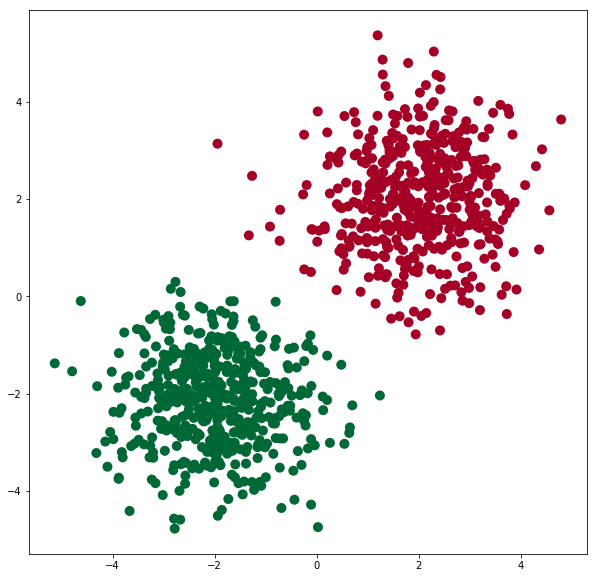

In [89]:
# generate toy classification data
torch.manual_seed(1)
n_data = torch.ones(500, 2)
x0 = torch.normal(2* n_data, 1)
y0 = torch.zeros(500)
x1 = torch.normal(-2 * n_data, 1)
y1 = torch.ones(500)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)
x, y = Variable(x), Variable(y)
plt.figure(figsize=(10,10))
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [90]:
x_var = Variable(x)
y_var = Variable(y)

In [91]:
class NeuralNet(nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(n_input, n_hidden)
        self.output = nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return x

In [92]:
net = NeuralNet(2, 10, 2)
optimizer = torch.optim.SGD(net.parameters(), lr=0.008)
loss_fn = torch.nn.CrossEntropyLoss()
print(net)

NeuralNet(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=2, bias=True)
)


In [93]:
plt.ion()
for e in range(5000):
    y_pred = net.forward(x_var)
    loss = loss_fn(y_pred, y_var)
    if e % 100 == 0:
        print("loss after epoch: " + str(e) + " is: " + str(loss.data.numpy()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

loss after epoch: 0 is: 0.61927015
loss after epoch: 100 is: 0.1279323
loss after epoch: 200 is: 0.06943118
loss after epoch: 300 is: 0.047918506
loss after epoch: 400 is: 0.036767047
loss after epoch: 500 is: 0.02993698
loss after epoch: 600 is: 0.025321519
loss after epoch: 700 is: 0.021984389
loss after epoch: 800 is: 0.019457009
loss after epoch: 900 is: 0.017473558
loss after epoch: 1000 is: 0.015873652
loss after epoch: 1100 is: 0.014555273
loss after epoch: 1200 is: 0.013449196
loss after epoch: 1300 is: 0.012506792
loss after epoch: 1400 is: 0.0116941715
loss after epoch: 1500 is: 0.010985775
loss after epoch: 1600 is: 0.010362538
loss after epoch: 1700 is: 0.009809613
loss after epoch: 1800 is: 0.00931561
loss after epoch: 1900 is: 0.008871619
loss after epoch: 2000 is: 0.008470215
loss after epoch: 2100 is: 0.008105542
loss after epoch: 2200 is: 0.0077726324
loss after epoch: 2300 is: 0.0074674264
loss after epoch: 2400 is: 0.0071866
loss after epoch: 2500 is: 0.006927138
los

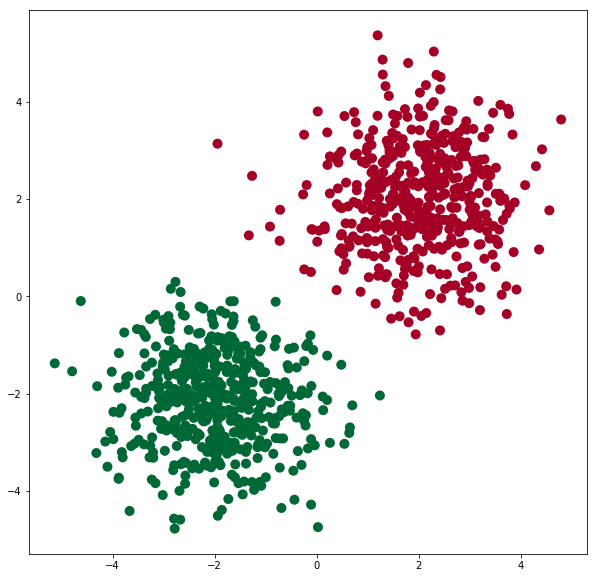

In [94]:
plt.figure(figsize=(10,10))
y_pred = net(x_var)
# print(F.softmax(y_pred, dim=1)[0])
# print(torch.max(F.softmax(y_pred, dim=1)[0]), 1)
_, prediction = torch.max(F.softmax(y_pred, dim=1), 1)
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=prediction.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()